In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

FOLDER = "/Users/brendan/Documents/projects/trails_project/data/series/"

sns.set_context("talk")

In [2]:
datafiles = [
    "low_range_optimality|2025-05-29/data.json",
    "wide_optimality_run|2025-05-28/data.json",
]

dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
util.describe(df)

ratios: [10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0 110.0 120.0 130.0
 140.0 150.0 160.0 170.0 180.0 190.0 200.0]
patch recovery: [0.001]
max costs: [2.0]
boundary conditions: ['SOLID']
num locations: [10]
random walker seeds: 8
random locations seeds: 2
patch recovery logic: ['LINEAR']


In [3]:
df.columns

Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement',
       'thresholdImprovement', 'steps', 'paths', 'weightedHeadings',
       'avgHeading', 'avgSquareHeading', 'patches',
       'settings.patchImprovement', 'settings.patchRecovery',
       'settings.maxCost', 'settings.boundaryConditions',
       'settings.numLocations', 'settings.randomSeedWalkers',
       'settings.randomSeedLocations', 'settings.recoveryLogic',
       'settings.improvementLogic', 'ratio'],
      dtype='object')

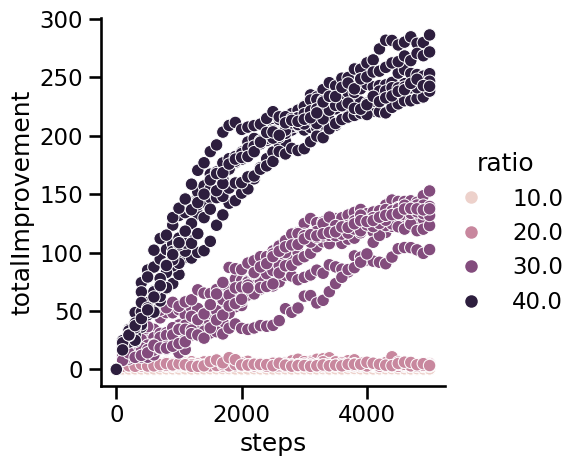

In [73]:
p = sns.relplot(data=df[(df["settings.randomSeedLocations"] == 1) & (df["ratio"] < 50)],
            y="totalImprovement",
            x="steps",
            hue="ratio",
            kind="scatter")

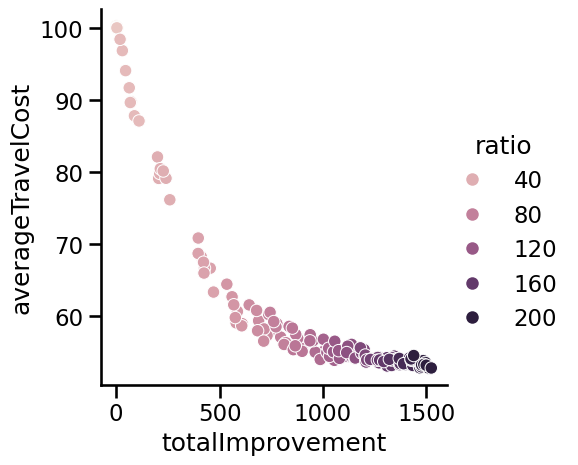

In [68]:
p = sns.relplot(data=df[(df["steps"] == 5000) & (df["settings.randomSeedLocations"] == 2)],
            y="averageTravelCost",
            x="totalImprovement",
            hue="ratio",
            kind="scatter")

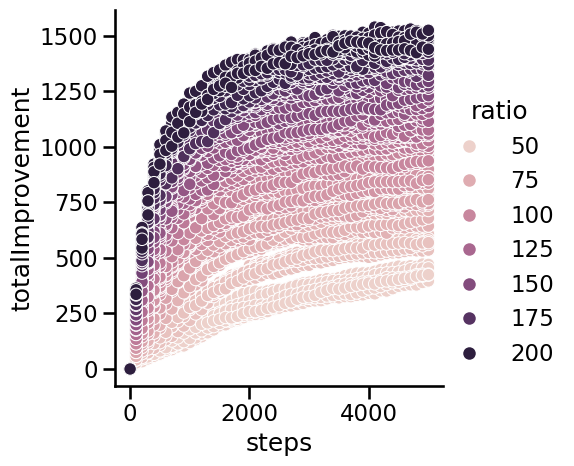

In [57]:
p = sns.relplot(data=df[(df["settings.randomSeedLocations"] == 2)],
            y="totalImprovement",
            x="steps",
            hue="ratio",
            kind="scatter")

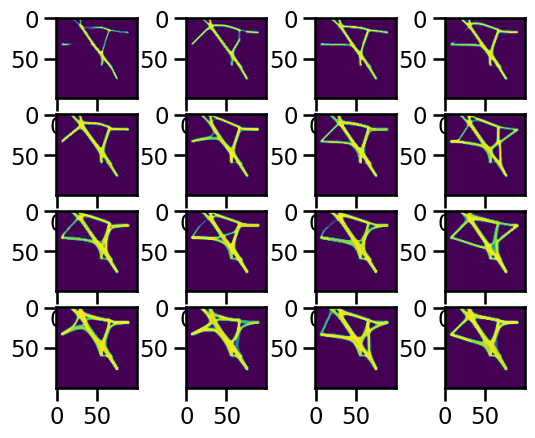

In [55]:
util.plot_patches(df[(df["steps"] == 5000) & (df["settings.randomSeedLocations"] == 1) & (df["settings.randomSeedWalkers"] == 4)]);

1


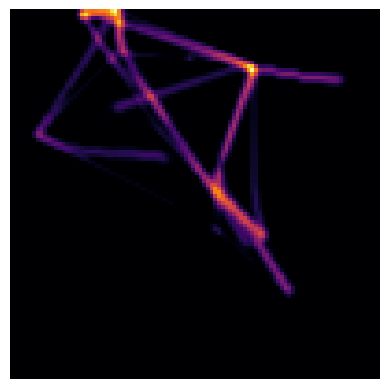

4


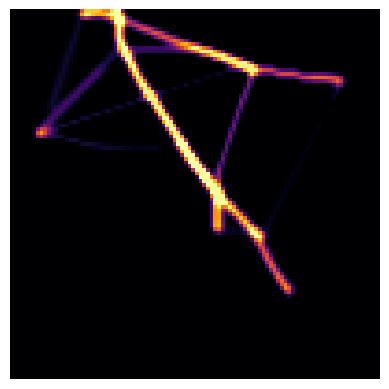

7


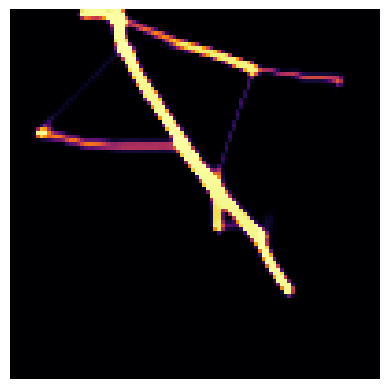

10


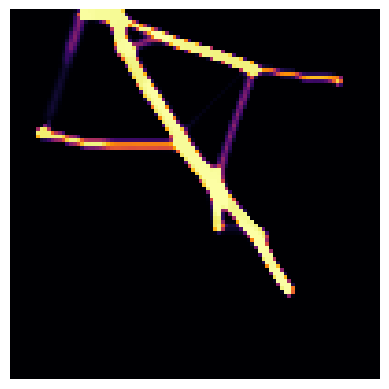

13


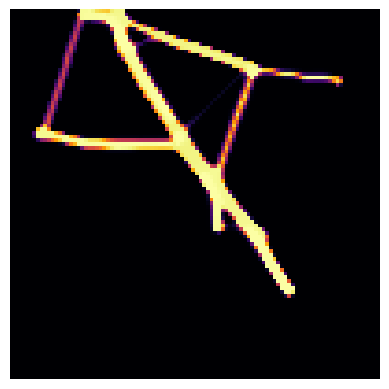

16


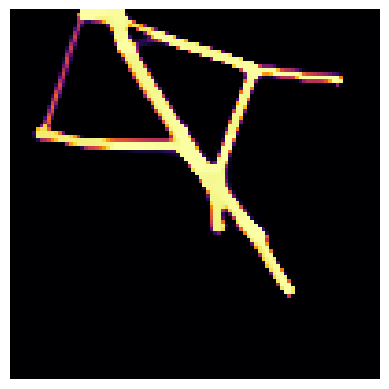

In [18]:
_df = df[(df["ratio"] == 100) & (df["settings.randomSeedLocations"] == 1) & (df["settings.randomSeedWalkers"] == 1) & (df["steps"] < 2000) ]
for i in range(1, 17, 3):
    print(i)
    plt.imshow(np.reshape(_df["patches"].iloc[i], (100, 100)), cmap="inferno")
    plt.axis('off')
    plt.show()